# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.36 s, sys: 85.1 ms, total: 2.45 s
Wall time: 4.2 s
Train ROC-AUC 0.9903
Valid ROC-AUC 0.9172
Test ROC-AUC 0.9057


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [7]:
results = {'train': [], 
           'test': []}

depths = range(1, 30, 2)

for depth in depths:
    tree_params = {'max_depth': depth}
    boosting = Boosting(base_model_params=tree_params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    
    results['train'].append(boosting.score(x_train, y_train))
    results['test'].append(boosting.score(x_test, y_test))

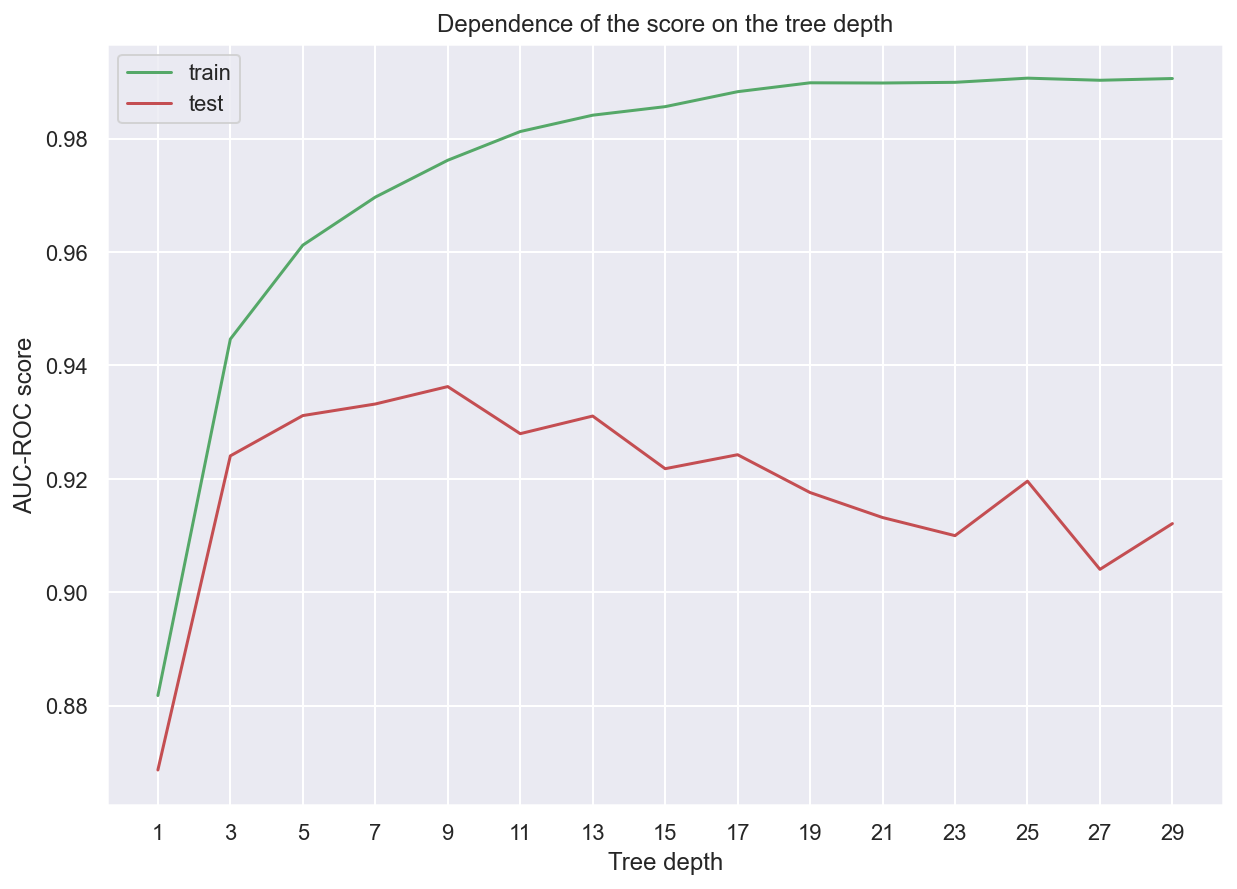

In [8]:
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12

plt.plot(depths, results['train'], c='g', label='train')
plt.plot(depths, results['test'], c='r', label='test')
plt.xlabel('Tree depth')
plt.ylabel('AUC-ROC score')
plt.xticks(depths)
plt.title('Dependence of the score on the tree depth')
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество на тренировочной выборке имеет модель с самыми глубокими деревьями, а лучшее значение метрики на тестовой выборке у дерева глубины 9. Думаю, дело в том, что маленькие деревья недостаточно мощные, чтобы решить задачу, а глубокие деревья сильно переобучаются под тренировочную выборку, поэтому они и дают снижение качества на тестовой выборке.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей (`n_estimators, learning_rate, max_depth, min_samples_leaf, subsample`).

In [9]:
# n_estimators, learning_rate, max_depth, min_samples_leaf, subsample
tree_params = {'max_depth': np.arange(1, 30, 2), 
               'min_samples_leaf': np.arange(1, 50, 2)}
model_params = {'n_estimators': np.arange(4, 101, 8), 
                'learning_rate': np.linspace(0.001, 1, 15), 
                'subsample': np.arange(0.1, 1, 0.1)}

In [11]:
# параметры с дефолтными значениями
tree_best = {'max_depth': None,
             'min_samples_leaf': 1}
model_best = {'n_estimators': 10,
              'learning_rate': 0.1,
              'subsample': 0.3}
all_params = list(tree_best.keys()) + list(model_best.keys())

for param in all_params:
    # list of scores for each value of parameter
    scores = []
    # model parameters are fixed
    model_par = model_best.copy()
    
    if param in tree_params.keys():
        # choosing the best value
        for val in tree_params[param]:
            tree_par = tree_best.copy()
            tree_par[param] = val
            model_par['base_model_params'] = tree_par
            
            boosting = Boosting(**model_par)
            boosting.fit(x_train, y_train, x_valid, y_valid)
            scores.append(boosting.score(x_valid, y_valid))
        # updating best value of the parameter to use it later
        tree_best[param] = tree_params[param][np.argmax(scores)]
        test_score = boosting.score(x_test, y_test)
        
        print(f'{param}: {tree_best[param]}, test_score: {np.round(test_score, 2)}')
    else:
        # fixating base_model_params for the tree
        model_par['base_model_params'] = tree_best
        for val in model_params[param]:
            model_par[param] = val
            
            boosting = Boosting(**model_par)
            boosting.fit(x_train, y_train, x_valid, y_valid)
            scores.append(boosting.score(x_valid, y_valid))
        
        model_best[param] = model_params[param][np.argmax(scores)]
        test_score = boosting.score(x_test, y_test)

        print(f'{param}: {np.round(model_best[param], 2)}, test_score: {np.round(test_score, 2)}')
    

max_depth: 9, test_score: 0.91
min_samples_leaf: 15, test_score: 0.94
n_estimators: 52, test_score: 0.94
learning_rate: 0.29, test_score: 0.93
subsample: 0.6, test_score: 0.94


Подбор параметров происходит следующим образом: по очереди выбираются параметры - сначала базовой модели, затем параметры бусинга, - при этом после нахождения каждого оптимального значения и при рассмотрении следующих параметров используются уже найденные оптимальные значения, чтобы поиск осуществлялся относительно них, а не относительно дефолтных значений каждого из параметров.

Результаты указаны выше. Вообще они довольно сильно зависят от рандома, так как при разных запусках `max_depth` варьируется от 7 до 11, а `n_estimators` вообще принимал значения от 52 до 100.

## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [ ]:
# YOUR CODE:

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [ ]:
# YOUR CODE:

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [ ]:
# YOUR CODE:

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

Вообще от 2022 года хочется, чтобы он прошел как-то более живо, чем этот. Ботать, конечно, тоже хорошо, но хочется и с людьми проводить время, бывать вне дома и на свои увлечения хоть сколько-то времени выделять - сложно. Хочется, чтобы недели не летели как дни и не сливались в единую целую кашу.

(Елку приходится прятать от кота, поэтому пришлось применить опыт скалолазания и самой немного превратиться в елочку)

<img src="https://drive.google.com/uc?id=1DMhcv3Y7RxGDzobVH7GAGh6gSEMWdfd8" width="450" align="center">